# **Ford GoBike Data Analysis**

## by - Ritwik Gupta

## Preliminary Wrangling

> Fork GoBike System is a public bicycle sharing system in Bay area of San Francisco. It was earlier started as by a company named Motivate in 2013 but was relaunched as Fork GoBike system in 2017 after a partnership with Ford.These were renamed to Bay Wheels. This system has both docked and dockless bicycles which can be used at anytime of the day at any day of the week(24*7) and each session is of 30 minutes. The dataset is available at https://www.lyft.com/bikes/bay-wheels/system-data.

The 2017 Ford GoBike data contains data from June 2017 to December 2017 which will be analyzed and visualized in this report. This report will contain both exploratory and explanatory analysis.

## Data Gathering
The data was downloaded from the link https://www.lyft.com/bikes/bay-wheels/system-data manually. Later, it was extracted and a csv file was obtained which is read into the pandas dataframe for further operations.

In [1]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
#Random sample of the dataset
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
224754,294,2017-10-20 04:43:49.3460,2017-10-20 04:48:44.0150,133,Valencia St at 22nd St,37.755213,-122.420975,129,Harrison St at 20th St,37.758862,-122.412544,439,Subscriber
498276,412,2017-07-18 09:19:07.4090,2017-07-18 09:25:59.4810,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,24,Spear St at Folsom St,37.789677,-122.390428,337,Subscriber
227879,282,2017-10-19 08:41:03.8790,2017-10-19 08:45:46.5930,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6,The Embarcadero at Sansome St,37.804770,-122.403234,3080,Subscriber
165173,380,2017-11-06 08:18:27.6880,2017-11-06 08:24:48.2620,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,2415,Subscriber
499306,481,2017-07-17 17:10:35.0040,2017-07-17 17:18:36.6410,37,2nd St at Folsom St,37.785000,-122.395936,13,Commercial St at Montgomery St,37.794231,-122.402923,169,Subscriber
172657,454,2017-11-03 09:21:31.7290,2017-11-03 09:29:06.2260,58,Market St at 10th St,37.776619,-122.417385,19,Post St at Kearny St,37.788975,-122.403452,213,Subscriber
501535,916,2017-07-15 20:24:07.6690,2017-07-15 20:39:23.7220,180,Telegraph Ave at 23rd St,37.812678,-122.268773,211,Broadway at 40th St,37.827757,-122.256716,1440,Customer
137876,214,2017-11-13 17:10:13.8470,2017-11-13 17:13:48.7960,64,5th St at Brannan St,37.776754,-122.399018,45,5th St at Howard St,37.781752,-122.405127,2510,Subscriber
237604,125,2017-10-16 17:45:44.6380,2017-10-16 17:47:49.8400,230,14th St at Mandela Pkwy,37.810743,-122.291415,160,West Oakland BART Station,37.805318,-122.294837,1406,Subscriber
228092,543,2017-10-19 08:10:51.0140,2017-10-19 08:19:54.6880,309,San Jose City Hall,37.337391,-121.886995,296,5th St at Virginia St,37.325998,-121.877120,1702,Subscriber


## Assessing the Data
The data will be explored in the following section. There will be a check for missing values and duplicate values. Also, any quality and tidiness issues will be checked.

In [4]:
#Information about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
#Statistics of the numerical columns of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [6]:
#Checking for the presence of any duplicated values
df.duplicated().any()

False

In [7]:
#Checking for missing/null values
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id           False
start_station_name         False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_name           False
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
dtype: bool

In [8]:
#Check for the different starting stations and the most popular station.
df.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

In [9]:
#Check for the different ending stations and the most popular station.
df.end_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
                                                             ...  
Pierce Ave at Market St                                          7
Harmon St at Adeline St                                          4
Jackson St at 11th St                                            3
Empire St at 1st St                                              2
Ellsworth St at Russell St                                       2
Name: end_station_name, Length: 272, dtype: int64

## Data Cleaning
1. The time columns are of the type objects.
2. The id columns are integer type.
3. Convert the duration_sec to duration_min.
4. Column for bike ride day,month and hour.

In [10]:
#Creating a copy of the dataset for cleaning
df_clean = df.copy()

In [11]:
#1. The time columns are of the type objects.
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [12]:
df_clean.start_time.head(),df_clean.end_time.head()

(0   2017-12-31 16:57:39.654
 1   2017-12-31 15:56:34.842
 2   2017-12-31 22:45:48.411
 3   2017-12-31 17:31:10.636
 4   2017-12-31 14:23:14.001
 Name: start_time, dtype: datetime64[ns],
 0   2018-01-01 15:12:50.245
 1   2018-01-01 13:49:55.617
 2   2018-01-01 11:28:36.883
 3   2018-01-01 10:47:23.531
 4   2018-01-01 02:29:57.571
 Name: end_time, dtype: datetime64[ns])

In [13]:
#2. The id columns are integer type.
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

In [14]:
#3. Convert the duration_sec to duration_min
df_clean['duration_sec'] = df_clean['duration_sec'].astype(float)
df_clean['duration_sec'] = df_clean['duration_sec']/60
df_clean.rename(columns={'duration_sec':'duration_min'},inplace=True)

In [15]:
#4. Creating columns for start day and month
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

In [16]:
#Converting the start day as category
week = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
start_week = pd.api.types.CategoricalDtype(ordered=True,categories=week)
df_clean['start_time_day'] = df_clean['start_time_day'].astype(start_week)

In [17]:
df_clean['start_time_day'].value_counts()

Tue    87865
Wed    87752
Thu    85243
Mon    81410
Fri    81165
Sat    50874
Sun    45391
Name: start_time_day, dtype: int64

In [18]:
#To extract month part of the the start time
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')

In [19]:
df_clean['start_time_month'].value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: start_time_month, dtype: int64

In [20]:
#Converting the start month as category
month = ['June', 'July', 'August', 'December', 'November', 'September', 'October']
start_month = pd.api.types.CategoricalDtype(ordered=True,categories=month)
df_clean['start_time_month'] = df_clean['start_time_month'].astype(start_month)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             519700 non-null  float64       
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [22]:
df_clean.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_day,start_time_hour,start_time_month
0,1335.166667,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Sun,16,December
1,1313.333333,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Sun,15,December
2,762.800000,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Sun,22,December
3,1036.200000,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Sun,17,December
4,726.716667,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Sun,14,December


In [23]:
df.shape

(519700, 13)

### What is the structure of your dataset?

The dataset chosen contains the data of the bikes rented in 2017 from June to December in the San Fransico Bay Area. There is a record of 519700 bike rentals along with 13 columns containing information about the bike rentals. These columns include information about - 
1. Bike ID
2. Start and end time of the bike.
3. Start and end station of the bike and their ids.
4. Duration of the bike in secs which was converted to duration of the bike in minutes since the pass is available in minutes.
5. Type of the user.

Two additional columns were created which are-

1. Month of the rental of bike
2. Day of the rental of the bike.


### What is/are the main feature(s) of interest in your dataset?

Features of interet are as follows - 
1. Trip time of each bike ride.
2. Most busy stations for start and end.
3. Months having maximum demand.
4. Day of the week having high demand.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features will help investigate the features of interest - 
1. duration_min (trip duration in minutes)
2. start_station_name and end_station_name
3. start_time_month
4. start_time_day
5. user_type

# Univariate Exploration
This section includes the different types of visualizations using a single variable.

In [24]:
df_clean.describe()

,duration_min,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_time_hour
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,18.316825,37.771653,-122.363927,37.771844,-122.363236,13.461037
std,57.402441,0.086305,0.105573,0.086224,0.105122,4.615019
min,1.016667,37.317298,-122.444293,37.317298,-122.444293,0.000000
25%,6.366667,37.773492,-122.411726,37.774520,-122.410345,9.000000
50%,9.933333,37.783521,-122.398870,37.783830,-122.398525,14.000000
75%,15.633333,37.795392,-122.391034,37.795392,-122.391034,17.000000
max,1439.483333,37.880222,-121.874119,37.880222,-121.874119,23.000000


### Distribution of duration of the ride

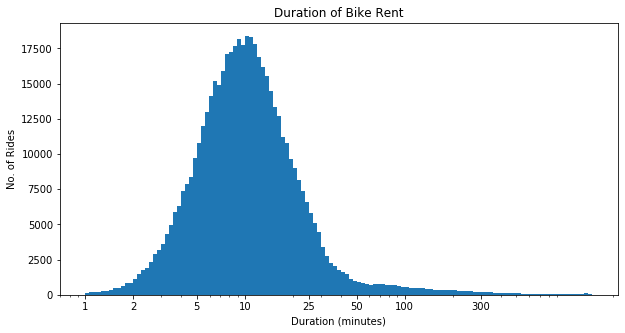

In [25]:
bins = 10**np.arange(0,np.log10(df_clean.duration_min.max())+0.025,0.025)
plt.figure(figsize=(10,5))
plt.hist(data = df_clean,x='duration_min',bins=bins)
plt.xscale('log');
ticks = [1,2,5,10,25,50,100,300]
labels = ["{}".format(x) for x in ticks]
plt.xticks(ticks,ticks);
plt.title('Duration of Bike Rent')
plt.xlabel('Duration (minutes)')
plt.ylabel('No. of Rides');

#### The distribution of the ride duration in minutes is a normal distribution implying that the the majority of the duration time lies between 2 and 50 minutes.

### Day with maximum demand of bikes

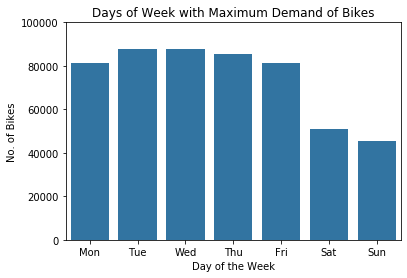

In [26]:
c = sns.color_palette()[0]
sns.countplot(data=df_clean,x='start_time_day',color=c)
plt.ylim(0,100000)
plt.title('Days of Week with Maximum Demand of Bikes');
plt.xlabel('Day of the Week')
plt.ylabel('No. of Bikes');

#### The distribution  shows that Tuesday and Wednesday are the days when the demand of the bikes is maximum followed by Monday,Thursday, Saturday and Sunday with Sunday having the least demand.

### Month Having Maximum Demand

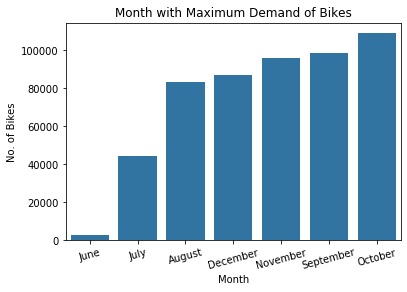

In [27]:
sns.countplot(data=df_clean,x='start_time_month',color=c)
plt.title('Month with Maximum Demand of Bikes');
plt.xticks(rotation=15)
plt.xlabel('Month')
plt.ylabel('No. of Bikes');

#### It is apparent that the month of October has the maximum demand for bikes and the month of June has the minimum demand.

### Different Categories of Users

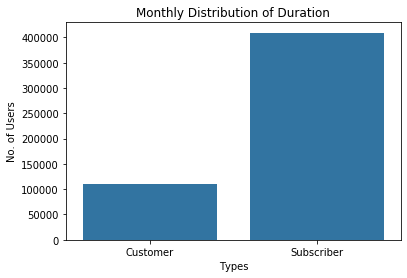

In [28]:
sns.countplot(data=df_clean,x='user_type',color=c)
plt.ylabel("No. of Users")
plt.xlabel("Types")
plt.title("Types of Users");
plt.title('Monthly Distribution of Duration');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. Most of the users belong to the subscriber category rather than the customer category.

2. The month of October observes the maximum number of rides in comparison to the other months.

3. The weekdays have much more bike usage as compared to the weekends probably as they are working days.

4. The majority of bike ride durations were between 5 to 25 minutes, while some unusual rides were more than 1000 minutes.

5. The Cusomer type of users had a longer ride time than the subscribers.

No transformation was required.

### Of the features you investigated, were there any unusual distributions? 

1. The demand in the month of October was much more than in other months of the year.
2.  Tuesdays and Wednesdays had more usage of bikes as compare to other days.
3.  Some of the bike ride durations were more than 1000 minutes which was quite unusual.

# Bivariate Exploration

### Average Ride duration of Customers

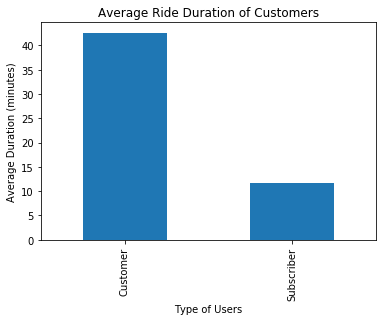

In [29]:
mean = df_clean.groupby('user_type')['duration_min'].mean().plot(kind='bar')
plt.title('Average Ride Duration of Customers')
plt.xlabel('Type of Users')
plt.ylabel('Average Duration (minutes)');

#### The above bar plot shows that the majority of the users are subscribers rather than customers.

###  Number of Trips in a week

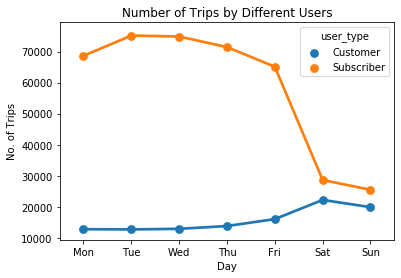

In [30]:
weekly = df_clean.groupby(['start_time_day', 'user_type']).size().reset_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=weekly, x='start_time_day',y=0, hue = 'user_type', order = days);

plt.title('Number of Trips by Different Users')
plt.xlabel('Day')
plt.ylabel('No. of Trips');

#### The Customers rent bikes on the week-ends rather than the week days. On the other hand, the subscribers have a high no. of trips on the weekdays which reduces on the weekends.

###  Number of Trips in a month

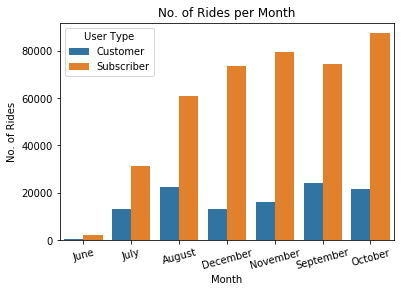

In [31]:
sns.countplot(data=df_clean,x='start_time_month',hue='user_type')
plt.xticks(rotation=15);
plt.xlabel('Month')
plt.ylabel('No. of Rides')
plt.title('No. of Rides per Month');
plt.legend(title='User Type');

#### Monthly, the major users of the bike are the subscribers as compared to the customers.Also, during the month of October, the no. of rides by subscribers increases while it decreases for the customers.

### Average Duration of trips in different months

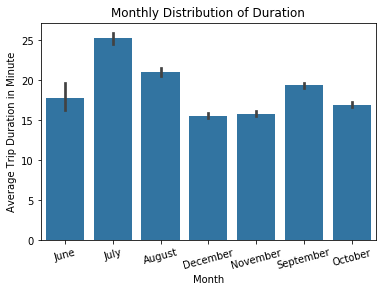

In [32]:
sns.barplot(data=df_clean, x='start_time_month', y='duration_min', color=c);
plt.ylabel('Average Trip Duration in Minute');
plt.xticks(rotation=15);
plt.xlabel('Month');
plt.title('Monthly Distribution of Duration');

#### The month of July has the longest bike trips even though the number of trips are maximum in October. This implies that the bike rides are taken for much longer durations in July as compared to other months.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The type of users played a major role in terms of analysis of other features. The types of users clearly justify the usage of the bikes. On week-days, the subscribers have to commute to the place of work so they have a high usage of bikes as compared to the weekends, when they don't have to go to work. The customers on the other hand use the bikes on the weekends as they have time on the weekends to ride bicycles. The data implies that the customers are casual riders which may include tourists or student while the subscribers are the working class of people who need bikes for everyday use.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The duration of the rides in the month of July is unusally high even though the number of trips in July are not the maximum. This is probably beacuse the casual bike riders like to use the bikes for longer journeys during summer period. The month of October despite having the largest numer of trips do not have a significant amount of trip duration as during October, the rides are mainly used by the employees to travel to work place and not by customers for long rides.

## Multivariate Exploration

In [33]:
df_clean.groupby('user_type')['duration_min'].mean()

user_type
Customer      42.624096
Subscriber    11.755175
Name: duration_min, dtype: float64

### Ride Duration by Different Users

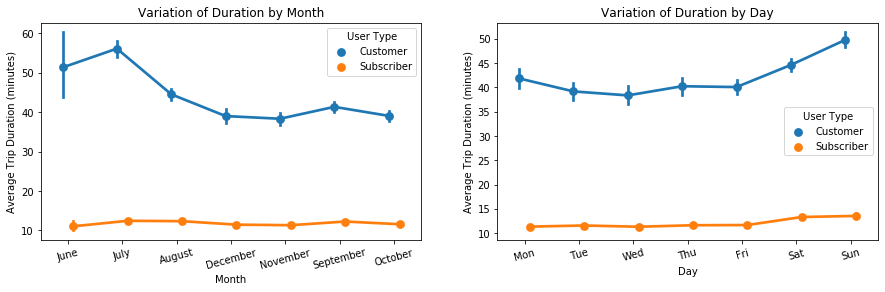

In [34]:
plt.figure(figsize=(15,4))
#Duration distribution during months
plt.subplot(1,2,1)
sns.pointplot(data=df_clean, x='start_time_month', y='duration_min', hue='user_type', dodge=0.2);
plt.xlabel('Month');
plt.ylabel('Average Trip Duration (minutes)');
plt.xticks(rotation=15)
plt.title('Variation of Duration by Month')
plt.legend(title='User Type')
#Duration distribution during week
plt.subplot(1,2,2)
sns.pointplot(data=df_clean, x='start_time_day', y='duration_min', hue='user_type', dodge=0.2);
plt.xlabel('Day');
plt.ylabel('Average Trip Duration (minutes)');
plt.xticks(rotation=15);
plt.title('Variation of Duration by Day')
plt.legend(title='User Type');

### Mean Trip Duration by Hour and Week 

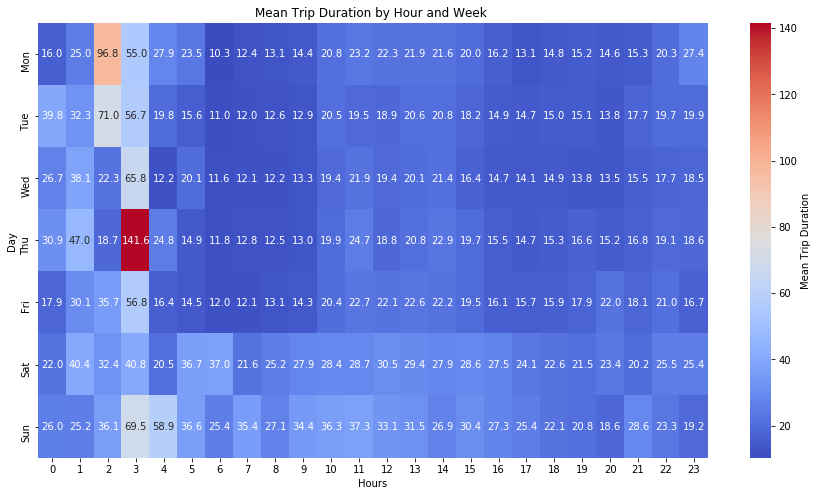

In [35]:
pivot = df_clean.pivot_table(values='duration_min',index='start_time_day',columns='start_time_hour')
plt.figure(figsize=(15,8))
sns.heatmap(data=pivot,annot=True,fmt='.1f',cbar_kws={'label':'Mean Trip Duration'},cmap='coolwarm')
plt.title('Mean Trip Duration by Hour and Week ');
plt.xlabel('Hours')
plt.ylabel('Day');

#### It can bve observed that through the week, on the week days the durations are shotter as most of the subscribed users use it during office hours. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The average duration of the bike trips of the subscribers follows a similar pattern through each week of the month because their main purpose of bike rides is to travel to work place during week days and that is why they have subscribed for the service. The monthly pattern for the subscribes is almost similar through the year. For the customers, which do not use the bikes for everyday use, their bike ride duration is quite high during the month oh July as the customers might be students casual users who want to spend summer breaks for long rides. Weekly, these casual customers have a higher duration of bike rides during the weekends, as they might find time to go for long bike rides during the weekends.
These strengthen the fact that the customers use the bikes less number of times but for longer durations which is the opposite for the subscribers.